# Dynamical decoupling of a non-Markovian environment

### Introduction

Followings https://journals.aps.org/pra/pdf/10.1103/PhysRevA.58.2733 we consider an example of dynamical decoupling.
We choose a drive which performs pi rotations, interspersed with short periods where the bath causes dephasing.

We first show the standard example of equally spaced pulses, and then consider the 'optimal' Uhrig spacing (Götz S. Uhrig
Phys. Rev. Lett. 98, 100504 (2007)).

In [1]:
%pylab inline
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

from qutip.nonmarkov.bofin_solvers import HEOMSolver
from qutip.nonmarkov.bofin_baths import DrudeLorentzPadeBath, DrudeLorentzBath


In [4]:
def coth(x):
    """
    coth function
    """
    return 1./np.tanh(x)

def cot(x):
    return 1./np.tan(x)



Text(0, 0.5, 'J')

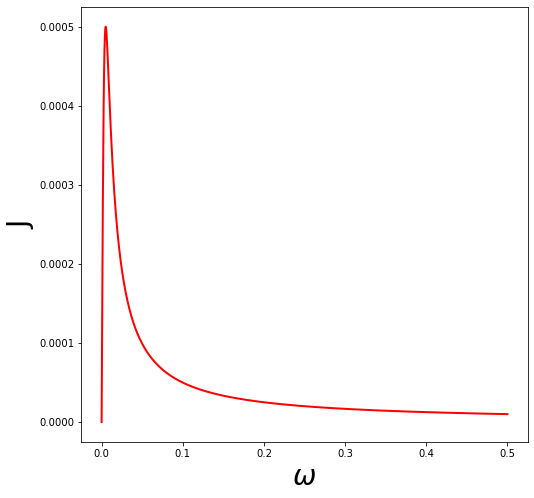

In [10]:


pref = 1.
Nk = 3

Q = sigmaz()
T = .05
beta = 1./T

lam = 0.0005
gamma = 0.005

bath = DrudeLorentzBath(Q, lam=lam, gamma=gamma, T=T, Nk=Nk, tag="bath1")

wlist = np.linspace(0, 0.5, 1000)
pref = 1.

J = [w * 2 * lam * gamma / ((gamma**2 + w**2)) for w in wlist]


fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(wlist, J, 'r', linewidth=2)
axes.set_xlabel(r'$\omega$', fontsize=28)
axes.set_ylabel(r'J', fontsize=28)



In [11]:

wq = 1.
Hsys = 0.0 * sigmaz()


optionsODE = Options(nsteps=1500, store_states=True,rtol=1e-12,atol=1e-12,max_step = 1/(20))

ttotal=400.
tlist2 = np.linspace(0, ttotal, 50000)

NC = 10

def drive(t):
    V = .5
    tp = pi/(2.*V)  

    delt = 20.
    N = int(ttotal/(tp + delt))
    RF = 0.
    for n in arange(1,N+1):
        if t >= n*delt+(n-1)*tp:
            if t<=n*delt + n*tp:
                

                RF += V
    return RF


# start with a superposition so there is something to dephase!

sup = (basis(2,1)+basis(2,0))/sqrt(2.)
initial_state2 = sup * sup.dag()

#With pulses
H_d = [Hsys,[sigmax(), drive]]
resultHEOM = HEOMSolver(H_d, bath, NC, options=optionsODE)
outputDD  = resultHEOM.run(initial_state2,tlist2)



#Without pulses
H_d = [Hsys,[0.*sigmax(), drive]]
resultHEOM = HEOMSolver(H_d, bath, NC, options=optionsODE)
outputnoDD  = resultHEOM.run(initial_state2,tlist2)



In [12]:



def driveslow(t):
    V = .01
    tp = pi/(2.*V)  #here i need factor of 1/2 for RWA

    delt = 20.
    N = int(ttotal/(tp + delt))
    RF = 0.
    for n in arange(1,N+1):
        if t >= n*delt+(n-1)*tp:
            if t<=n*delt + n*tp:
                

                RF += V
    return RF


#With pulses
H_d = [Hsys,[sigmax(), driveslow]]
resultHEOM = HEOMSolver(H_d, bath, NC, options=optionsODE)
outputDDslow  = resultHEOM.run(initial_state2,tlist2)



#Without pulses
H_d = [Hsys,[0.*sigmax(), driveslow]]
resultHEOM = HEOMSolver(H_d, bath, NC, options=optionsODE)
outputnoDDslow  = resultHEOM.run(initial_state2,tlist2)




In [13]:
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['axes.titlesize'] = 25
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['xtick.labelsize'] = 28
matplotlib.rcParams['ytick.labelsize'] = 28
matplotlib.rcParams['legend.fontsize'] = 28
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['font.family'] = 'STIXgeneral' 
matplotlib.rcParams['mathtext.fontset'] =  'stix'
matplotlib.rcParams["font.serif"] = "STIX"
matplotlib.rcParams['text.usetex'] = False

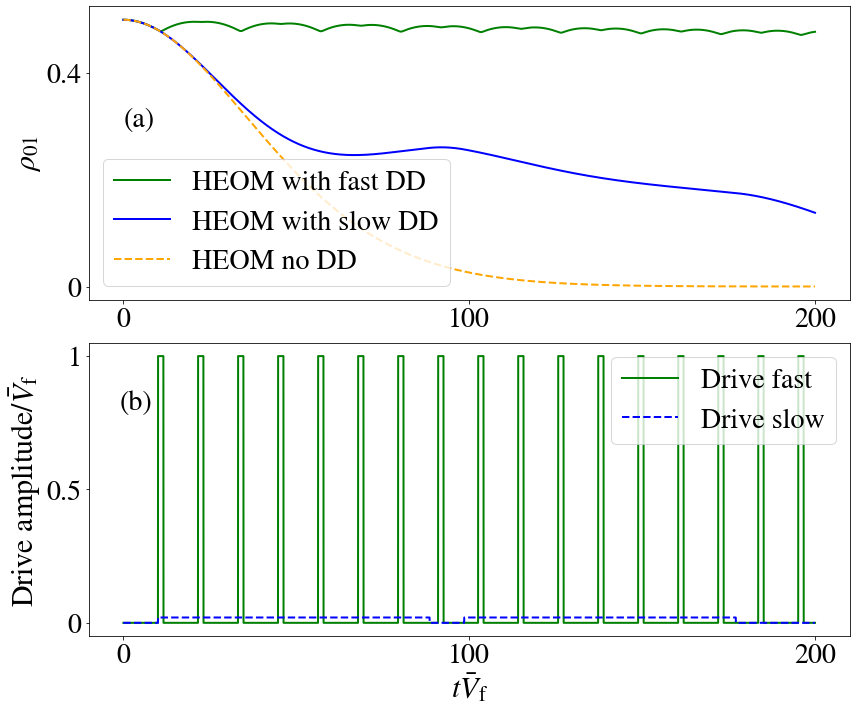

In [14]:

fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,10))



P12DD=expect(outputDD.states,basis(2,1)*basis(2,0).dag())
P12noDD=expect(outputnoDD.states,basis(2,1)*basis(2,0).dag())

P12DDslow=expect(outputDDslow.states,basis(2,1)*basis(2,0).dag())
P12noDDslow=expect(outputnoDDslow.states,basis(2,1)*basis(2,0).dag())

plt.sca(axes[0])
plt.yticks([0.,0.4],[0,0.4])
axes[0].plot(tlist2*0.5, real(P12DD), 'green', linestyle='-', linewidth=2, label="HEOM with fast DD")
axes[0].plot(tlist2*0.5, real(P12DDslow), 'blue', linestyle='-', linewidth=2, label="HEOM with slow DD")
axes[0].plot(tlist2*0.5, real(P12noDD), 'orange', linestyle='--', linewidth=2, label="HEOM no DD")


axes[0].locator_params(axis='y', nbins=3)
axes[0].locator_params(axis='x', nbins=3)


axes[0].set_ylabel(r"$\rho_{01}$", fontsize=30)

axes[0].legend()
axes[0].text(0,0.3,"(a)",fontsize=28)

pulse = [drive(t) for t in tlist2]
pulseslow = [driveslow(t) for t in tlist2]

plt.sca(axes[1])
plt.yticks([0.,0.5,1],[0,0.5,1])

axes[1].plot(tlist2*0.5, 2*array(pulse), 'green', linestyle='-', linewidth=2, label="Drive fast")
axes[1].plot(tlist2*0.5, 2*array(pulseslow), 'blue', linestyle='--', linewidth=2, label="Drive slow")
axes[1].legend()



axes[1].locator_params(axis='y', nbins=3)
axes[1].locator_params(axis='x', nbins=3)



#axes[1].set_xlim(200,600)
axes[1].set_xlabel(r'$t\bar{V}_{\mathrm{f}}$', fontsize=30)
axes[1].set_ylabel(r'Drive amplitude/$\bar{V}_{\mathrm{f}}$', fontsize=30)
#axes[1].legend(loc=0)

axes[1].text(-1,0.8,"(b)",fontsize=28)

fig.tight_layout()
#fig.savefig("ddfig.pdf")

Next we consider non-equally spaced pulses.  Rather than plot as a function of time we just consider the final coherence after time $T$ and 100 pulses.  We change the width of the environment to demonstate that the Uhrig sequence can be sub-optimal when the bath is very broad.

In [16]:
#change plotting style so we have set N_pulses and plot for gamma*Tmax
import timeit

pref = 1.
Nk = 5
Q = sigmaz()
T = .5
beta = 1./T


sup = (basis(2,1)+basis(2,0))/sqrt(2.)
initial_state2 = sup * sup.dag()

V = 10. #in short, _s data
tp = pi/(2.*V)  #we need Vtp = pi/2
Tmax = 100
gamma_list = np.linspace(0.005,0.05, 20)



DD_eq_gamma_plot = []
DD_opt_gamma_plot = []


N_pulse = 100


def gather_data(lam2, NC2):
    start = timeit.default_timer()
    DD_eq_t = []
    DD_opt_t = []
    for gamkk,gamma in enumerate(gamma_list):
        print(gamkk)



        
        bath = DrudeLorentzBath(Q, lam=lam2, gamma=gamma, T=T, Nk=Nk, tag="bath1")
        tlist2 = np.linspace(0, Tmax, 10000)

        Hsys = 0.0 * sigmaz()
        # we need to set max integration step so pulses are not skipped.
        # shortest time scale are the pulses themselves, with width pi/2*V
        # other time scales for pulses are Tmax/Npulses
        max_step = 1/(20.) #
        optionsODE = Options(nsteps=1500, store_states=True,rtol=1e-12,atol=1e-12,max_step = max_step)
     


        def drive(t):  # equidistant pulses

            N = N_pulse+1#int(ttotal/(tp + delt))
            delt = (Tmax-(N-1)*tp)/N

            RF = 0.
            for n in arange(1,N):
                #between n and n+1 apply pulse:
                if t >= n*delt+(n-1)*tp: 
                    if t<=n*delt + n*tp:
                        RF += V
            return RF




        H_d = [liouvillian(Hsys,[]),[liouvillian(sigmax(),[]), drive]]
        resultHEOM = HEOMSolver(H_d, bath, NC2, options=optionsODE)
        outputDD  = resultHEOM.run(initial_state2,tlist2)

        DD_eq_t.append(outputDD.states)



        #optimized



        def drive_opt(t): #optimized distance


            #N = int(ttotal/(tp + delt))
            N = N_pulse
            #lets imagine that tp-> 0
            #then lets arrange the pulses around this assumption

            #then the distribution is accross a range (ttotal - N*tp)

            #lets optimize this in the following way... no longer equidistant pulses of delt=20

            delt_list = [sin(pi*j/(2*N+2))**2 * (Tmax - N*tp) for j in arange(1,N+1)] #if Npulses is odd, N+2?
            RF = 0.
            for n in arange(1,N+1):
                if t >= delt_list[n-1]+(n-1)*tp:
                    if t<= delt_list[n-1] + n*tp:
                        RF += V
            return RF




        H_d = [Hsys,[sigmax(), drive_opt]]
        resultHEOM = HEOMSolver(H_d, bath, NC2, options=optionsODE)
        outputDD_opt  = resultHEOM.run(initial_state2,tlist2)



        DD_opt_t.append(outputDD_opt.states)
   
    end =  timeit.default_timer()
    print(end-start)
    P12_opt_gamma_plot=[]
    for DD in DD_opt_t:
    
        P12_opt_gamma_plot.append(expect(DD[-1],basis(2,1)*basis(2,0).dag()))
 
    

    P12_eq_gamma_plot=[]
    for DD in DD_eq_t:
        

        P12_eq_gamma_plot.append(expect(DD[-1],basis(2,1)*basis(2,0).dag()))
    
    

    return P12_opt_gamma_plot, P12_eq_gamma_plot

P12_opt_gamma_plot_001, P12_eq_gamma_plot_001 = gather_data(0.01,4)
P12_opt_gamma_plot_0005, P12_eq_gamma_plot_0005 = gather_data(0.005,4)
P12_opt_gamma_plot_00005, P12_eq_gamma_plot_00005 = gather_data(0.0005,4)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1016.8145733000129
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
924.9250295000384
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
794.3191641000449


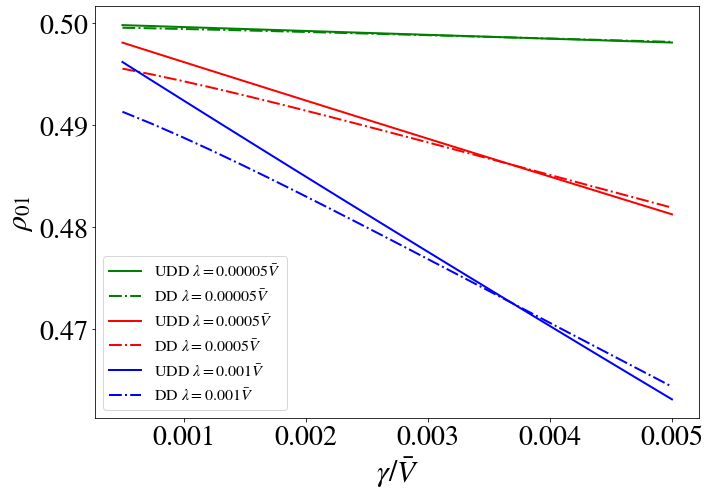

In [17]:
#Pade Nk5
fig, axes = plt.subplots(1, 1, sharex=False, figsize=(10,7))


axes.plot(array(gamma_list)/10 , real(P12_opt_gamma_plot_00005), 'green', linestyle='-', linewidth=2, label=r"UDD $\lambda=0.00005 \bar{V}$")
axes.plot(array(gamma_list)/10, real(P12_eq_gamma_plot_00005), 'green', linestyle='-.', linewidth=2, label=r"DD $\lambda=0.00005\bar{V}$")

axes.plot(array(gamma_list)/10 , real(P12_opt_gamma_plot_0005), 'red', linestyle='-', linewidth=2, label=r"UDD $\lambda=0.0005\bar{V}$")
axes.plot(array(gamma_list)/10 , real(P12_eq_gamma_plot_0005), 'red', linestyle='-.', linewidth=2, label=r"DD $\lambda=0.0005\bar{V}$")

axes.plot(array(gamma_list)/10 , real(P12_opt_gamma_plot_001), 'blue', linestyle='-', linewidth=2, label=r"UDD $\lambda=0.001 \bar{V}$")
axes.plot(array(gamma_list)/10 , real(P12_eq_gamma_plot_001), 'blue', linestyle='-.', linewidth=2, label=r"DD $\lambda=0.001\bar{V}$")


axes.set_ylabel(r"$\rho_{01}$")



axes.set_xlabel(r"$\gamma/\bar{V}$")

axes.legend(fontsize=16)


fig.tight_layout()
#fig.savefig("ddoptcomparev6.pdf")